In [1]:
!pip install pandas numpy matplotlib seaborn -q

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv("/Users/omsapkar/Downloads/Sales_Funnel_Analysis_Complex.csv")

# Display the first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

      Lead_ID Customer_Name  Age  Gender   Region       Industry  \
0  LEAD000001    Customer_1   57    Male     West      Education   
1  LEAD000002    Customer_2   58  Female  Central         Retail   
2  LEAD000003    Customer_3   19    Male  Central         Travel   
3  LEAD000004    Customer_4   24    Male  Central  Manufacturing   
4  LEAD000005    Customer_5   72    Male     East         Retail   

   Revenue_Potential   Lead_Source          Stage  Time_Spent_in_Stage_Days  \
0           51793.77         Event      Awareness                        22   
1           37685.98           SEO      Awareness                       112   
2           15832.90           SEO       Interest                         2   
3           71323.62         Email       Interest                        55   
4           27182.85  Social Media  Consideration                        65   

   Engagement_Score  Converted Preferred_Contact_Method  \
0             68.05          0                     Chat  

In [5]:
# Count the number of leads at each stage
stage_counts = df['Stage'].value_counts()

# Calculate conversion rates
conversion_rates = stage_counts / stage_counts.sum()

# Display the results
print("Leads at each stage:\n", stage_counts)
print("\nConversion rates:\n", conversion_rates)

Leads at each stage:
 Stage
Awareness        2791
Interest         2441
Consideration    1779
Intent           1410
Evaluation       1024
Purchase          555
Name: count, dtype: int64

Conversion rates:
 Stage
Awareness        0.2791
Interest         0.2441
Consideration    0.1779
Intent           0.1410
Evaluation       0.1024
Purchase         0.0555
Name: count, dtype: float64


/var/folders/x8/6n97vt752tbd1myzll984sq80000gn/T/ipykernel_45294/2483043360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stage_counts.index, y=stage_counts.values, palette='Blues_d')


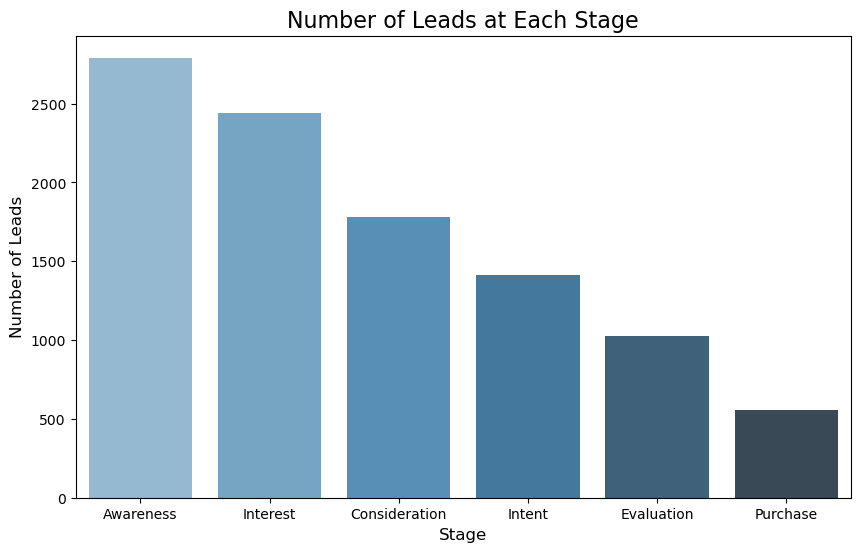

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x=stage_counts.index, y=stage_counts.values, palette='Blues_d')
plt.title('Number of Leads at Each Stage', fontsize=16)
plt.xlabel('Stage', fontsize=12)
plt.ylabel('Number of Leads', fontsize=12)
plt.show()

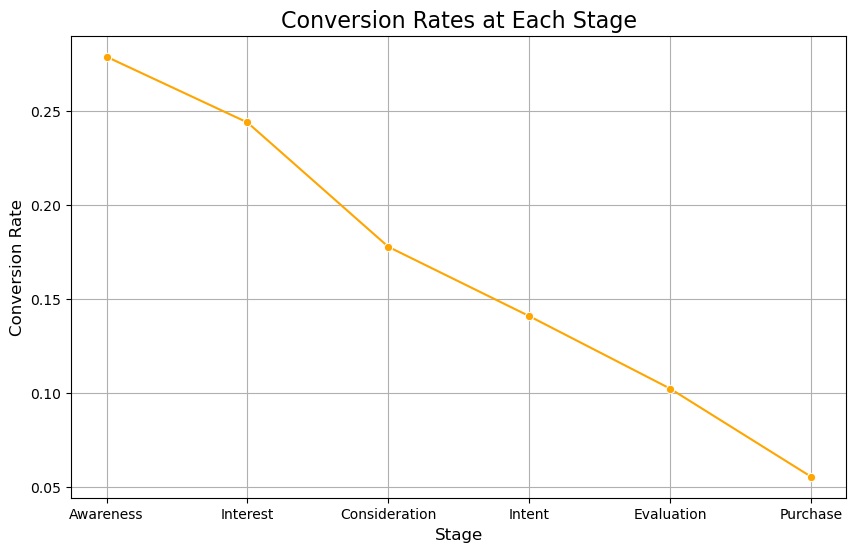

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=stage_counts.index, y=conversion_rates.values, marker='o', color='orange')
plt.title('Conversion Rates at Each Stage', fontsize=16)
plt.xlabel('Stage', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.grid()
plt.show()

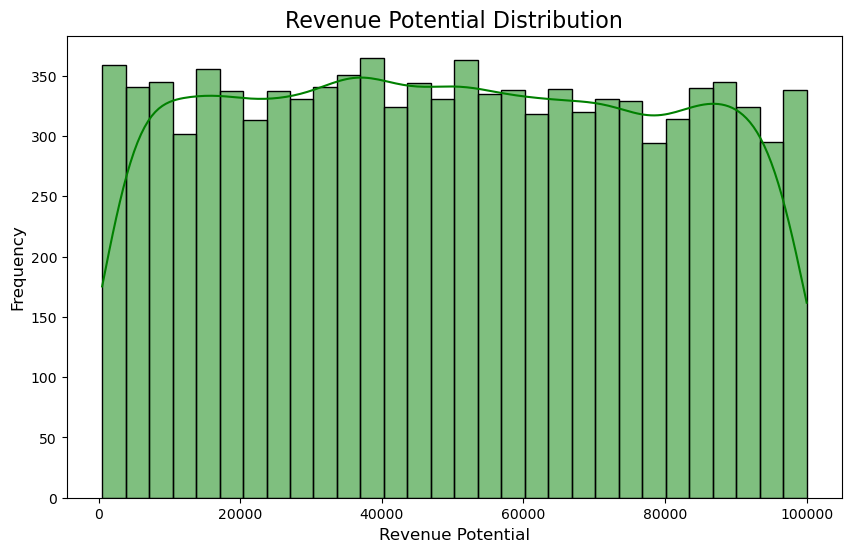

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue_Potential'], bins=30, kde=True, color='green')
plt.title('Revenue Potential Distribution', fontsize=16)
plt.xlabel('Revenue Potential', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

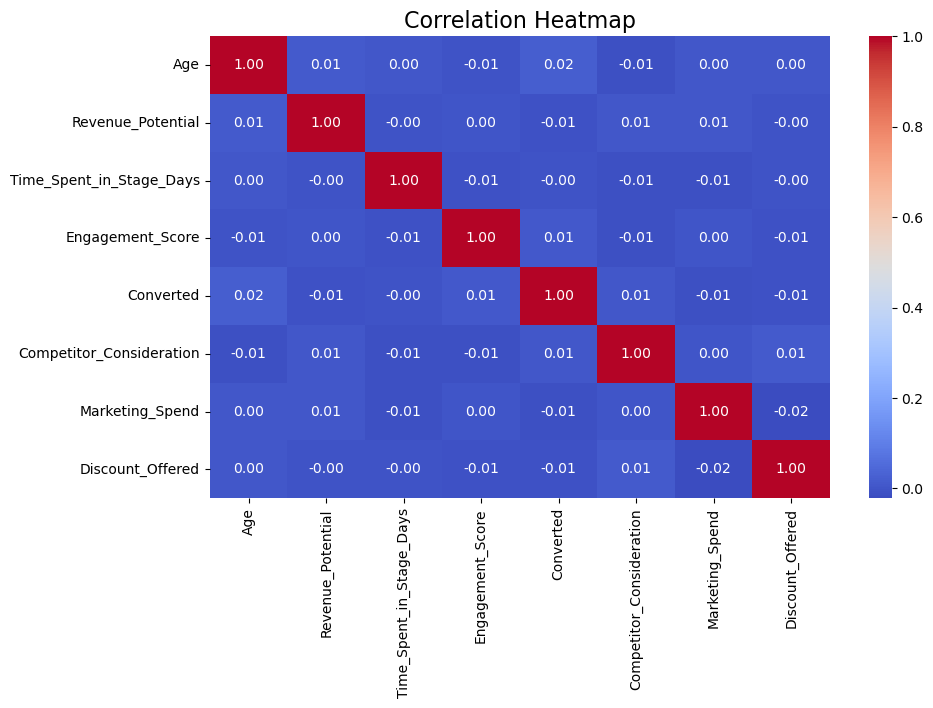

In [9]:
plt.figure(figsize=(10, 6))
correlation = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Average Discount Offered by Conversion Status:
 Converted
0    15.034311
1    14.872440
Name: Discount_Offered, dtype: float64


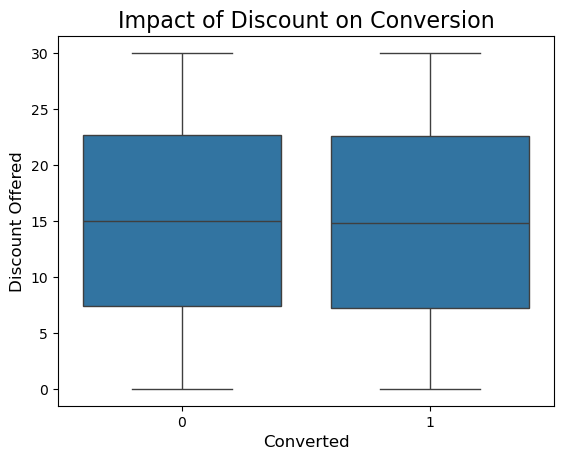

In [10]:
# Average discount by conversion status
discount_conversion = df.groupby('Converted')['Discount_Offered'].mean()
print("Average Discount Offered by Conversion Status:\n", discount_conversion)

# Visualize the impact of discounts
sns.boxplot(x='Converted', y='Discount_Offered', data=df)
plt.title('Impact of Discount on Conversion', fontsize=16)
plt.xlabel('Converted', fontsize=12)
plt.ylabel('Discount Offered', fontsize=12)
plt.show()

In [12]:
summary = {
    'Total Leads': len(df),
    'Total Conversions': df['Converted'].sum(),
    'Overall Conversion Rate': round(df['Converted'].mean() * 100, 2),
    'Average Revenue Potential': round(df['Revenue_Potential'].mean(), 2)
}
print("Summary Report:\n", summary)

Summary Report:
 {'Total Leads': 10000, 'Total Conversions': 2164, 'Overall Conversion Rate': 21.64, 'Average Revenue Potential': 49715.52}
